In [0]:
from __future__ import print_function
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
np.random.seed(1337)  # for reproducibility
from keras.preprocessing import sequence
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Embedding
from keras.layers.normalization import BatchNormalization
from keras.layers import Input, Dense
from keras.layers import Convolution1D,MaxPooling1D, Flatten
from keras.layers import Convolution1D, Dense, Dropout, Flatten, MaxPooling1D
from keras.models import Model
from keras.utils.np_utils import to_categorical
from sklearn.metrics import (precision_score, recall_score,f1_score, accuracy_score,mean_squared_error,mean_absolute_error)
from sklearn import metrics
from sklearn.preprocessing import Normalizer
import h5py
from keras import callbacks
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, CSVLogger
import tensorflow.keras.backend as K


Using TensorFlow backend.


In [0]:
data= pd.read_csv('drive/My Drive/BE FINAL/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv', index_col=None)

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
from collections import Counter
Counter(data[" Label"])

Counter({'BENIGN': 97718, 'DDoS': 128027})

In [0]:
from sklearn.preprocessing import LabelEncoder
encodings = dict()
for c in data.columns:
    #print df[c].dtype
    if data[c].dtype == "object":
        encodings[c] = LabelEncoder() #to give numerical label to char type labels.
        encodings[c]
        data[c] = encodings[c].fit_transform(data[c])
        #testdata[c] = encodings[c].fit_transform(testdata[c])

In [0]:
from sklearn.model_selection import train_test_split
train,test = train_test_split(data, test_size=0.1, random_state=42)#random for splitting same data when run again.
train,valdata = train_test_split(train, test_size=0.11, random_state=42)#random for splitting same data when run again.

print(valdata.shape)
print(train.shape)
print(test.shape)
#test.to_csv('drive/My Drive/BE FINAL/cic_final-code-results/cic-ddos-test_data.csv')

(22349, 79)
(180821, 79)
(22575, 79)


In [0]:
Counter(data[" Label"])

Counter({0: 97718, 1: 128027})

In [0]:
X = train.iloc[:,0:78]
Y = train.iloc[:,78]
C = test.iloc[:,78]
T = test.iloc[:,0:78]
vx = valdata.iloc[:,0:78]
vy = valdata.iloc[:,78]
vx.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
40037,80,5076817,2,1,12,0,6,6,6.000000,0.000000,0,0,0.0,0.000000,2.363686,0.590921,2.538408e+06,3.517714e+06,5025808,51009,5076817,5.076817e+06,0.000000e+00,5076817,5076817,0,0.00,0.000000e+00,0,0,0,0,0,0,40,32,0.393948,0.196974,0,6,4.500000,3.000000,9.000000e+00,0,0,0,0,1,0,0,0,0,6.000000,6.000000,0.0,40,0,0,0,0,0,0,2,12,1,0,258,368,1,20,0.0,0.0,0,0,0.0,0.0,0,0
132474,80,90823143,8,5,56,11601,20,0,7.000000,5.656854,7300,0,2320.2,3022.508098,128.348344,0.143135,7.568595e+06,2.470000e+07,85800000,1,90800000,1.300000e+07,3.220000e+07,85800000,1,16647,4161.75,4.767794e+03,9492,83,0,0,0,0,172,112,0.088083,0.055052,0,7300,833.071429,2033.250541,4.134108e+06,0,0,0,0,1,0,0,0,0,897.153846,7.000000,2320.2,172,0,0,0,0,0,0,8,56,5,11601,256,229,6,20,4973877.0,0.0,4973877,4973877,85800000.0,0.0,85800000,85800000
149714,80,46761,3,5,26,11607,20,0,8.666667,10.263203,10135,0,2321.4,4413.201989,248775.689100,171.082740,6.680143e+03,1.738488e+04,46104,4,423,2.115000e+02,2.736503e+02,405,18,46750,11687.50,2.294505e+04,46104,4,0,0,0,0,72,112,64.156027,106.926712,0,10135,1292.555556,3350.634907,1.120000e+07,0,0,0,1,0,0,0,0,1,1454.125000,8.666667,2321.4,72,0,0,0,0,0,0,3,26,5,11607,8192,229,2,20,0.0,0.0,0,0,0.0,0.0,0,0
148083,34544,9054927,1,5,6,30,6,6,6.000000,0.000000,6,6,6.0,0.000000,3.975736,0.662623,1.810985e+06,4.029061e+06,9018345,1,0,0.000000e+00,0.000000e+00,0,0,9021764,2255441.00,4.508603e+06,9018345,1,0,0,0,0,20,100,0.110437,0.552186,6,6,6.000000,0.000000,0.000000e+00,0,0,0,0,1,1,0,0,5,7.000000,6.000000,6.0,20,0,0,0,0,0,0,1,6,5,30,229,0,0,20,36582.0,0.0,36582,36582,9018345.0,0.0,9018345,9018345
43094,80,236035,4,0,24,0,6,6,6.000000,0.000000,0,0,0.0,0.000000,101.679836,16.946639,7.867833e+04,1.354089e+05,235034,1,236035,7.867833e+04,1.354089e+05,235034,1,0,0.00,0.000000e+00,0,0,0,0,0,0,80,0,16.946639,0.000000,6,6,6.000000,0.000000,0.000000e+00,0,0,0,0,1,0,0,0,0,7.500000,6.000000,0.0,80,0,0,0,0,0,0,4,24,0,0,256,-1,3,20,0.0,0.0,0,0,0.0,0.0,0,0


In [0]:
X=X.drop([' Bwd PSH Flags',' Fwd URG Flags',' Bwd URG Flags',' RST Flag Count',' CWE Flag Count',' ECE Flag Count','Fwd Avg Bytes/Bulk',' Fwd Avg Packets/Bulk',' Fwd Avg Bulk Rate',' Bwd Avg Bytes/Bulk',' Bwd Avg Packets/Bulk','Bwd Avg Bulk Rate',' Active Max',' Bwd IAT Min',' act_data_pkt_fwd','Idle Mean',' Active Std',' Fwd Packet Length Max',' Idle Min',' Bwd Packets/s'], axis = 1) 
T=T.drop([' Bwd PSH Flags',' Fwd URG Flags',' Bwd URG Flags',' RST Flag Count',' CWE Flag Count',' ECE Flag Count','Fwd Avg Bytes/Bulk',' Fwd Avg Packets/Bulk',' Fwd Avg Bulk Rate',' Bwd Avg Bytes/Bulk',' Bwd Avg Packets/Bulk','Bwd Avg Bulk Rate',' Active Max',' Bwd IAT Min',' act_data_pkt_fwd','Idle Mean',' Active Std',' Fwd Packet Length Max',' Idle Min',' Bwd Packets/s'], axis = 1)
vx=vx.drop([' Bwd PSH Flags',' Fwd URG Flags',' Bwd URG Flags',' RST Flag Count',' CWE Flag Count',' ECE Flag Count','Fwd Avg Bytes/Bulk',' Fwd Avg Packets/Bulk',' Fwd Avg Bulk Rate',' Bwd Avg Bytes/Bulk',' Bwd Avg Packets/Bulk','Bwd Avg Bulk Rate',' Active Max',' Bwd IAT Min',' act_data_pkt_fwd','Idle Mean',' Active Std',' Fwd Packet Length Max',' Idle Min',' Bwd Packets/s'], axis = 1)  

In [0]:
X.shape

(180821, 58)

In [0]:
trainXcnn = np.array(X)
testTcnn = np.array(T)
valx_nn = np.array(vx)

trainXcnn.astype(float)
testTcnn.astype(float)
valx_nn.astype(float)

array([[8.00000000e+01, 5.07681700e+06, 2.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [8.00000000e+01, 9.08231430e+07, 8.00000000e+00, ...,
        4.97387700e+06, 0.00000000e+00, 8.58000000e+07],
       [8.00000000e+01, 4.67610000e+04, 3.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [8.00000000e+01, 4.08250000e+04, 3.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [8.00000000e+01, 1.02625128e+08, 8.00000000e+00, ...,
        1.12800000e+03, 5.92000000e+07, 9.29000000e+07],
       [8.00000000e+01, 6.01599400e+06, 5.00000000e+00, ...,
        7.89000000e+02, 0.00000000e+00, 6.01520500e+06]])

In [0]:
scaler = Normalizer().fit(trainXcnn)
trainXcnn = scaler.transform(trainXcnn)

scaler = Normalizer().fit(testTcnn)
testTcnn = scaler.transform(testTcnn)

scaler = Normalizer().fit(valx_nn)
valx_nn = scaler.transform(valx_nn)

In [0]:
from sklearn.preprocessing import StandardScaler #normalization
trainX= StandardScaler().fit_transform(X)
testT= StandardScaler().fit_transform(T)
valx= StandardScaler().fit_transform(vx)


In [0]:
y_train = np.array(Y)
y_test = np.array(C)
valy = np.array(vy)

from collections import Counter
Counter(y_test)

Counter({0: 9658, 1: 12917})

In [0]:
y_train1= to_categorical(y_train)
y_test1= to_categorical(y_test)
valy1= to_categorical(valy)


X_train = np.array(trainX)
X_test = np.array(testT)##
X_val = np.array(valx)##

X_train_nn = np.array(trainXcnn)
X_test_nn = np.array(testTcnn)##
x_val_nn = np.array(valx_nn)##



batch_size = 64
print(y_train1.shape)
print(y_test1.shape)
X_train_nn.shape

(180821, 2)
(22575, 2)


(180821, 58)

In [0]:
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors=1,weights='uniform')
neigh.fit(X_train, y_train)
pred_knn = neigh.predict(X_test) # test the output 
# Python script for confusion matrix creation. 
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
 
results = confusion_matrix(y_test, pred_knn) 
print('Confusion Matrix :')
print(results) 
print('Accuracy Score :',accuracy_score(y_test, pred_knn))
print('Report : ')
print(classification_report(y_test, pred_knn))

Confusion Matrix :
[[ 9651     7]
 [    3 12914]]
Accuracy Score : 0.9995570321151717
Report : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9658
           1       1.00      1.00      1.00     12917

    accuracy                           1.00     22575
   macro avg       1.00      1.00      1.00     22575
weighted avg       1.00      1.00      1.00     22575



In [0]:
# reshape input to be [samples, time steps, features]
X_train1_nn = np.reshape(X_train_nn, (X_train_nn.shape[0],X_train_nn.shape[1],1))
X_test1_nn = np.reshape(X_test_nn, (X_test_nn.shape[0],X_test_nn.shape[1],1))
x_val1_nn = np.reshape(x_val_nn, (x_val_nn.shape[0],x_val_nn.shape[1],1))

X_test1_nn.shape

(22575, 58, 1)

In [0]:
from keras.models import model_from_json
import h5py

json_file = open('/content/drive/My Drive/BE FINAL/cic_final-code-results/nn_model.json', 'r')
nn_model_json = json_file.read()
json_file.close()
model = model_from_json(nn_model_json)
model.load_weights("/content/drive/My Drive/BE FINAL/cic_final-code-results/nn_model.h5")
model._make_predict_function()
	 

#pred_nn = nn_model.predict_classes(X_test_nn)





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.








In [0]:

# 1. define the network
from time import time
import tensorflow as tf
from keras.models import model_from_json

t0 = time()

# 1. define the network
model = Sequential()
model.add(Dense(128,input_dim=58,activation='relu'))  
model.add(Dropout(0.01))
model.add(Dense(64,activation='relu'))  
model.add(Dropout(0.01))
model.add(Dense(128,activation='relu'))  
model.add(Dropout(0.01))
model.add(Dense(2))
model.add(Activation('softmax'))
stopper = EarlyStopping(monitor='val_acc', patience = 10, mode='auto')
checkpointer = callbacks.ModelCheckpoint(filepath="drive/My Drive/BE FINAL/cic_final-code-results/checkpoint-{epoch:02d}.hdf5", verbose=1, save_best_only=True, monitor='val_acc',mode='max')
csv_logger = CSVLogger('drive/My Drive/BE FINAL/cic_final-code-results/cnntrainanalysis3.csv',separator=',', append=False)
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])#,tf.keras.metrics.Precision()])#, tf.keras.metrics.Recall()])
history = model.fit(X_train_nn, y_train1,batch_size=batch_size,validation_data=(x_val_nn, valy1),nb_epoch=1000,callbacks = [stopper,checkpointer,csv_logger])
# serialize model to JSON
#model_json = model.to_json()
#with open("drive/My Drive/BE FINAL/cic_final-code-results/nn_model.json", "w") as json_file:
   # json_file.write(model_json)
# serialize weights to HDF5
#model.save_weights("drive/My Drive/BE FINAL/cic_final-code-results/nn_model.h5")
#print("Saved model to disk")
tt = time() - t0
print("Predicted in {} seconds".format(round(tt,3)))






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.





Train on 180821 samples, validate on 22349 samples
Epoch 1/1000





180821/180821 [==============================] - 8s 45us/step - loss: 0.0528 - acc: 0.9839 - val_loss: 0.0228 - val_acc: 0.9930

Epoch 00001: val_acc improved from -inf to 0.99302, saving model to drive/My Drive/BE FINAL/cic_final-code-results/checkpoint-01.hdf5
Epoch 2/1000
180821/180821 [==============================] - 8s 42us/step - loss: 0.0251 - acc: 0.9928 - val_loss: 0.0188 - val_acc: 0.9950

Epoch 00002: val_acc improved from 0.99302 to 0.99499, saving model to drive/My Drive/BE FINAL/cic_final-code-results/checkpoint-02.hdf5
Epoch 3/1000
180821/180821 [==============================] - 7s 41us/step - loss: 0.0199 - acc: 0.9944 - val_loss: 0.0149 - val_acc: 0.9957

Epoch 00003: val_acc improved from 0.99499 to 0.99570, saving model to drive/My Drive/BE FINAL/cic_final-code-results/checkpoint-03.hdf5
Epoch 4/1000
180821/180821 [==============================] - 7s 41us/step - loss: 0.0152 - acc: 0.9960 - v

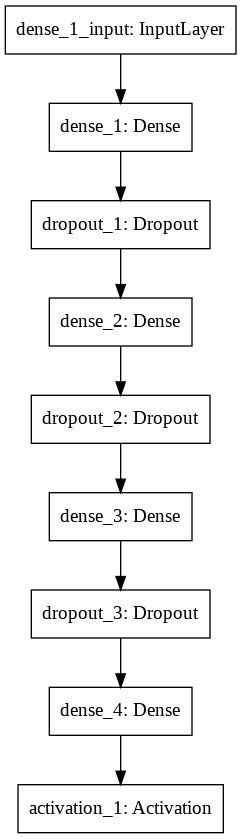

In [0]:
from keras.utils import plot_model
plot_model(model, to_file='drive/My Drive/BE FINAL/cic_final-code-results/Algo2-cicddos_model.png')

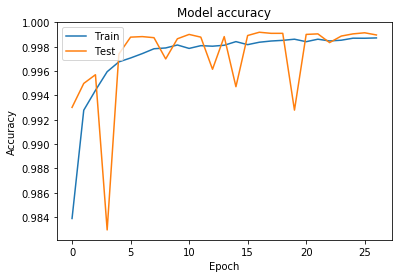

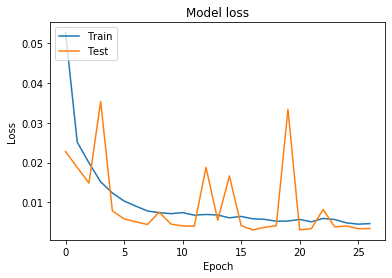

In [0]:
# Plot training & validation accuracy values
import matplotlib.pyplot as plt

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [0]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])#,tf.keras.metrics.Precision()])#, tf.keras.metrics.Recall()])

pred_cnn1 = model.predict_classes(X_test_nn)
loss, accuracy = model.evaluate(X_test_nn, y_test1)
print(accuracy)#preci=0.99,0.99 ,0.9994241417497232
# Python script for confusion matrix creation. 
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
 
results = confusion_matrix(y_test, pred_cnn1) 
print('Confusion Matrix :')
print(results) 
print('Accuracy Score :',accuracy_score(y_test, pred_cnn1))
print('Report : ')
print(classification_report(y_test, pred_cnn1))




22575/22575 [==============================] - 1s 23us/step
0.999202657807309
Confusion Matrix :
[[ 9646    12]
 [    6 12911]]
Accuracy Score : 0.999202657807309
Report : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9658
           1       1.00      1.00      1.00     12917

    accuracy                           1.00     22575
   macro avg       1.00      1.00      1.00     22575
weighted avg       1.00      1.00      1.00     22575



In [0]:
y_test1.shape

(22575, 2)

In [0]:
pred_cnn_prob = model.predict_proba(X_test_nn, batch_size = 64)


In [0]:
ind=[]
for i in range(y_test.shape[0]):
  if y_test[i]!=pred_cnn1[i]:
    ind.append(i)

In [0]:
print(y_test.shape[0]-len(ind))

22554


In [0]:
k=0
corr=[]
for i in range(pred_cnn_prob.shape[0]):
  if i not in ind:
    pred_cnn_prob[i].sort()
    corr.append(abs(pred_cnn_prob[i][1]-pred_cnn_prob[i][0]))
    k+=1
l=0
for data in corr:
  if data<0.96:
    #print(data)
    l+=1
print(k)
print(l)


22557
27


In [0]:
wrong=[]
for data in ind:
  pred_cnn_prob[data].sort()
  wrong.append(abs(pred_cnn_prob[data][1]-pred_cnn_prob[data][0]))
l=0
for data in wrong:
  if data<0.96:
    #print(data)
    l+=1
print(l)
print(len(wrong))

11
18


In [0]:
error_index_nn=[]
error_index_nn_X=[]
error_index_nn_Y=[]
for i in range(pred_cnn_prob.shape[0]):
  pred_cnn_prob[i].sort()
  if abs(pred_cnn_prob[i][1]-pred_cnn_prob[i][0])<0.96:
    error_index_nn.append(i)
    error_index_nn_X.append(X_test[i])
    error_index_nn_Y.append(y_test[i])
print(len(error_index_nn))
#print(error_index_nn_X)

38


In [0]:
error_index_nn_X1 = np.array(error_index_nn_X)
print(error_index_nn_X1)

[[-0.03562279 -0.27513139 -0.15076789 ... -0.23616799 -0.28377233
  -0.48214009]
 [-0.44125973 -0.51722243 -0.15076789 ... -0.23616799 -0.28377233
  -0.48214009]
 [-0.42285395 -0.51925774 -0.31992795 ... -0.23616799 -0.28377233
  -0.48214009]
 ...
 [-0.42285395 -0.51925771 -0.31992795 ... -0.23616799 -0.28377233
  -0.48214009]
 [ 1.73341061 -0.51925796 -0.23534792 ... -0.23616799 -0.28377233
  -0.48214009]
 [-0.42285395 -0.51925729 -0.31992795 ... -0.23616799 -0.28377233
  -0.48214009]]


In [0]:
from sklearn.neighbors import KNeighborsClassifier

from sklearn.externals import joblib
neigh = KNeighborsClassifier(n_neighbors=4,weights='uniform')
neigh.fit(X_train,y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

In [0]:
filename = 'drive/My Drive/BE FINAL/cic_final-code-results/knn_model.sav'
joblib.dump(neigh, filename)

['drive/My Drive/BE FINAL/cic_final-code-results/knn_model.sav']

In [0]:
pred_knn_prob = neigh.predict_proba(error_index_nn_X1)
pred_cnn1 = model.predict_classes(X_test_nn)

print(pred_knn_prob)

[[1.   0.  ]
 [0.   1.  ]
 [1.   0.  ]
 [1.   0.  ]
 [0.   1.  ]
 [0.   1.  ]
 [1.   0.  ]
 [0.   1.  ]
 [1.   0.  ]
 [1.   0.  ]
 [0.   1.  ]
 [0.   1.  ]
 [0.5  0.5 ]
 [0.   1.  ]
 [1.   0.  ]
 [0.   1.  ]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [0.   1.  ]
 [1.   0.  ]
 [0.   1.  ]
 [1.   0.  ]
 [0.   1.  ]
 [1.   0.  ]
 [1.   0.  ]
 [0.25 0.75]
 [1.   0.  ]
 [0.   1.  ]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [0.   1.  ]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]]


In [0]:
pred_knn = neigh.predict(error_index_nn_X1) # test the output 

In [0]:
print('Accuracy Score :',accuracy_score(error_index_nn_Y, pred_knn))


Accuracy Score : 0.9473684210526315


In [0]:
i=0
for data in error_index_nn:

  pred_knn_prob[i].sort()
  if abs(pred_knn_prob[i][1]-pred_knn_prob[i][0])>0.00:
    pred_cnn1[data]=pred_knn[i]
  i+=1


In [0]:
i=0
for data in error_index_nn:
    pred_cnn1[data]=pred_knn[i]
    i+=1

In [0]:
print(Counter(y_test))#Counter({1: 12917, 0: 9658})
#Counter({1: 12914, 0: 9661})
print(Counter(pred_cnn1))

Counter({1: 12917, 0: 9658})
Counter({1: 12922, 0: 9653})


In [0]:
# Python script for confusion matrix creation. 
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
 
results = confusion_matrix(y_test, pred_cnn1) 
print('Confusion Matrix :')
print(results) 
print('Accuracy Score :',accuracy_score(y_test, pred_cnn1))#this is correct always!!!
print('Report : ')
print(classification_report(y_test, pred_cnn1))
#   0.9996013289036545
#

Confusion Matrix :
[[ 9654     4]
 [    5 12912]]
Accuracy Score : 0.9996013289036545
Report : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9658
           1       1.00      1.00      1.00     12917

    accuracy                           1.00     22575
   macro avg       1.00      1.00      1.00     22575
weighted avg       1.00      1.00      1.00     22575



In [0]:
ind1=[]
for i in range(y_test.shape[0]):
  if y_test[i]!=pred_cnn1[i]:
    ind1.append(i)
print(ind1)

[1344, 8444, 8987, 9599, 10967, 12497, 18355, 20989, 22234]
